In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read casualty data using pandas
dfc = pd.read_csv('dft-road-casualty-statistics-casualty-2010-2021.csv', low_memory=False)
dfc.head()

,Unnamed: 0,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,9494939,201001BS70003,2010,01BS70003,2,1,1,1,26,6,3,0,0,0,0,0,1,1,-1,E01002911
1,9494940,201001BS70004,2010,01BS70004,1,1,3,1,49,8,3,4,3,0,0,2,0,1,-1,E01002884
2,9494941,201001BS70006,2010,01BS70006,2,1,1,1,33,6,3,0,0,0,0,0,1,1,-1,E01001374
3,9494942,201001BS70007,2010,01BS70007,1,1,2,1,-1,-1,3,0,0,1,0,0,9,1,-1,E01002829
4,9494943,201001BS70008,2010,01BS70008,2,1,2,1,28,6,3,0,0,0,0,0,5,1,-1,E01001934


## Data Wrangling

Check the properties

In [3]:
dfc.shape

(2082582, 20)

In [4]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2082582 entries, 0 to 2082581
Data columns (total 20 columns):
 #   Column                              Dtype 
---  ------                              ----- 
 0   Unnamed: 0                          int64 
 1   accident_index                      object
 2   accident_year                       int64 
 3   accident_reference                  object
 4   vehicle_reference                   int64 
 5   casualty_reference                  int64 
 6   casualty_class                      int64 
 7   sex_of_casualty                     int64 
 8   age_of_casualty                     int64 
 9   age_band_of_casualty                int64 
 10  casualty_severity                   int64 
 11  pedestrian_location                 int64 
 12  pedestrian_movement                 int64 
 13  car_passenger                       int64 
 14  bus_or_coach_passenger              int64 
 15  pedestrian_road_maintenance_worker  int64 
 16  casualty_type     

In [5]:
dfc.describe()

,Unnamed: 0,accident_year,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
count,2.082582e+06,2.082582e+06,2.082582e+06,2.082582e+06,2.082582e+06,2.082582e+06,2.082582e+06,2.082582e+06,2.082582e+06,2.082582e+06,2.082582e+06,2.082582e+06,2.082582e+06,2.082582e+06,2.082582e+06,2.082582e+06,2.082582e+06
mean,1.053623e+07,2.014979e+03,1.484319e+00,1.410671e+00,1.485119e+00,1.403051e+00,3.596976e+01,6.224207e+00,2.846566e+00,6.990135e-01,5.239208e-01,2.593579e-01,7.821781e-02,6.211184e-02,7.334604e+00,1.039393e+00,1.290521e+00
std,6.011898e+05,3.354569e+00,1.191239e+00,1.944591e+00,7.155521e-01,4.991050e-01,1.918886e+01,2.400743e+00,3.872039e-01,2.017798e+00,1.770948e+00,6.024195e-01,5.308431e-01,3.482715e-01,8.027525e+00,9.687978e-01,3.382715e+00
min,9.494939e+06,2.010000e+03,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,1.001558e+07,2.012000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.200000e+01,5.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00,-1.000000e+00
50%,1.053623e+07,2.015000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.300000e+01,6.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00,-1.000000e+00
75%,1.105687e+07,2.018000e+03,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.900000e+01,8.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00,3.000000e+00
max,1.157752e+07,2.021000e+03,9.990000e+02,9.920000e+02,3.000000e+00,9.000000e+00,1.040000e+02,1.100000e+01,3.000000e+00,1.000000e+01,9.000000e+00,9.000000e+00,9.000000e+00,3.000000e+00,9.900000e+01,3.000000e+00,1.000000e+01


In [6]:
dfc.dtypes

Unnamed: 0                             int64
accident_index                        object
accident_year                          int64
accident_reference                    object
vehicle_reference                      int64
casualty_reference                     int64
casualty_class                         int64
sex_of_casualty                        int64
age_of_casualty                        int64
age_band_of_casualty                   int64
casualty_severity                      int64
pedestrian_location                    int64
pedestrian_movement                    int64
car_passenger                          int64
bus_or_coach_passenger                 int64
pedestrian_road_maintenance_worker     int64
casualty_type                          int64
casualty_home_area_type                int64
casualty_imd_decile                    int64
lsoa_of_casualty                      object
dtype: object

In [7]:
dfc.duplicated().sum()

0

In [8]:
dfc.isna().sum()

Unnamed: 0                            0
accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
lsoa_of_casualty                      0
dtype: int64

Brief summary of analysis done

- There are 2082582 rows and 20 columns in this dataset
- There are no duplicated and null values
- Worng data types will be changed and columns not needed will be dropped


#### Visualization

In [9]:
#check the value count of the values in casualty class and present in a plot
dfc.casualty_class.value_counts()

1    1345346
2     464172
3     273064
Name: casualty_class, dtype: int64

1 - Driver or Rider

2 - Passenger

3 - Pedestrian

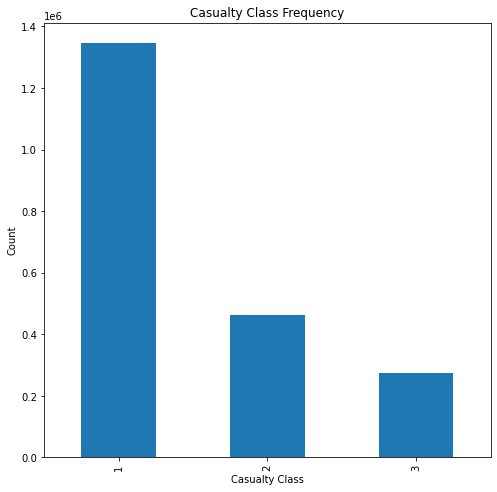

In [10]:

dfc.casualty_class.value_counts().plot(kind='bar', figsize=(8,8))
plt.xlabel('Casualty Class')
plt.ylabel('Count')
plt.title('Casualty Class Frequency');

Casualties mostly happened to drivers/riders compared to passengers and pedestrians

In [11]:
#check the value count of the values in sex_of_casualty and present in a plot
dfc.sex_of_casualty.value_counts()

 1    1235180
 2     844650
-1       2728
 9         24
Name: sex_of_casualty, dtype: int64

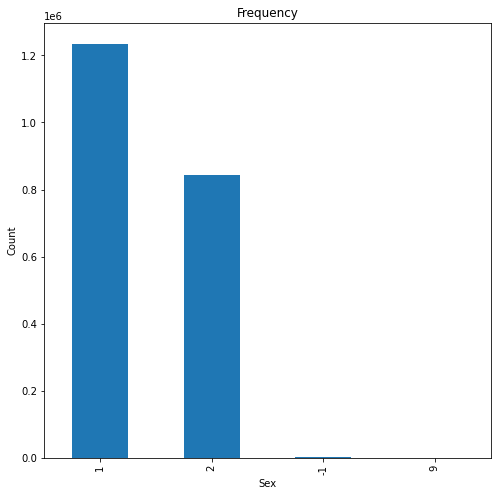

In [12]:
dfc.sex_of_casualty.value_counts().plot(kind='bar', figsize=(8,8))
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Frequency');

1 - Male

2 - Female

-1 - Missing Data

9 - Unknown


Majority of accidents happened to males compared to females

Next, the similarity between casualty class and sex of driver will be looked at

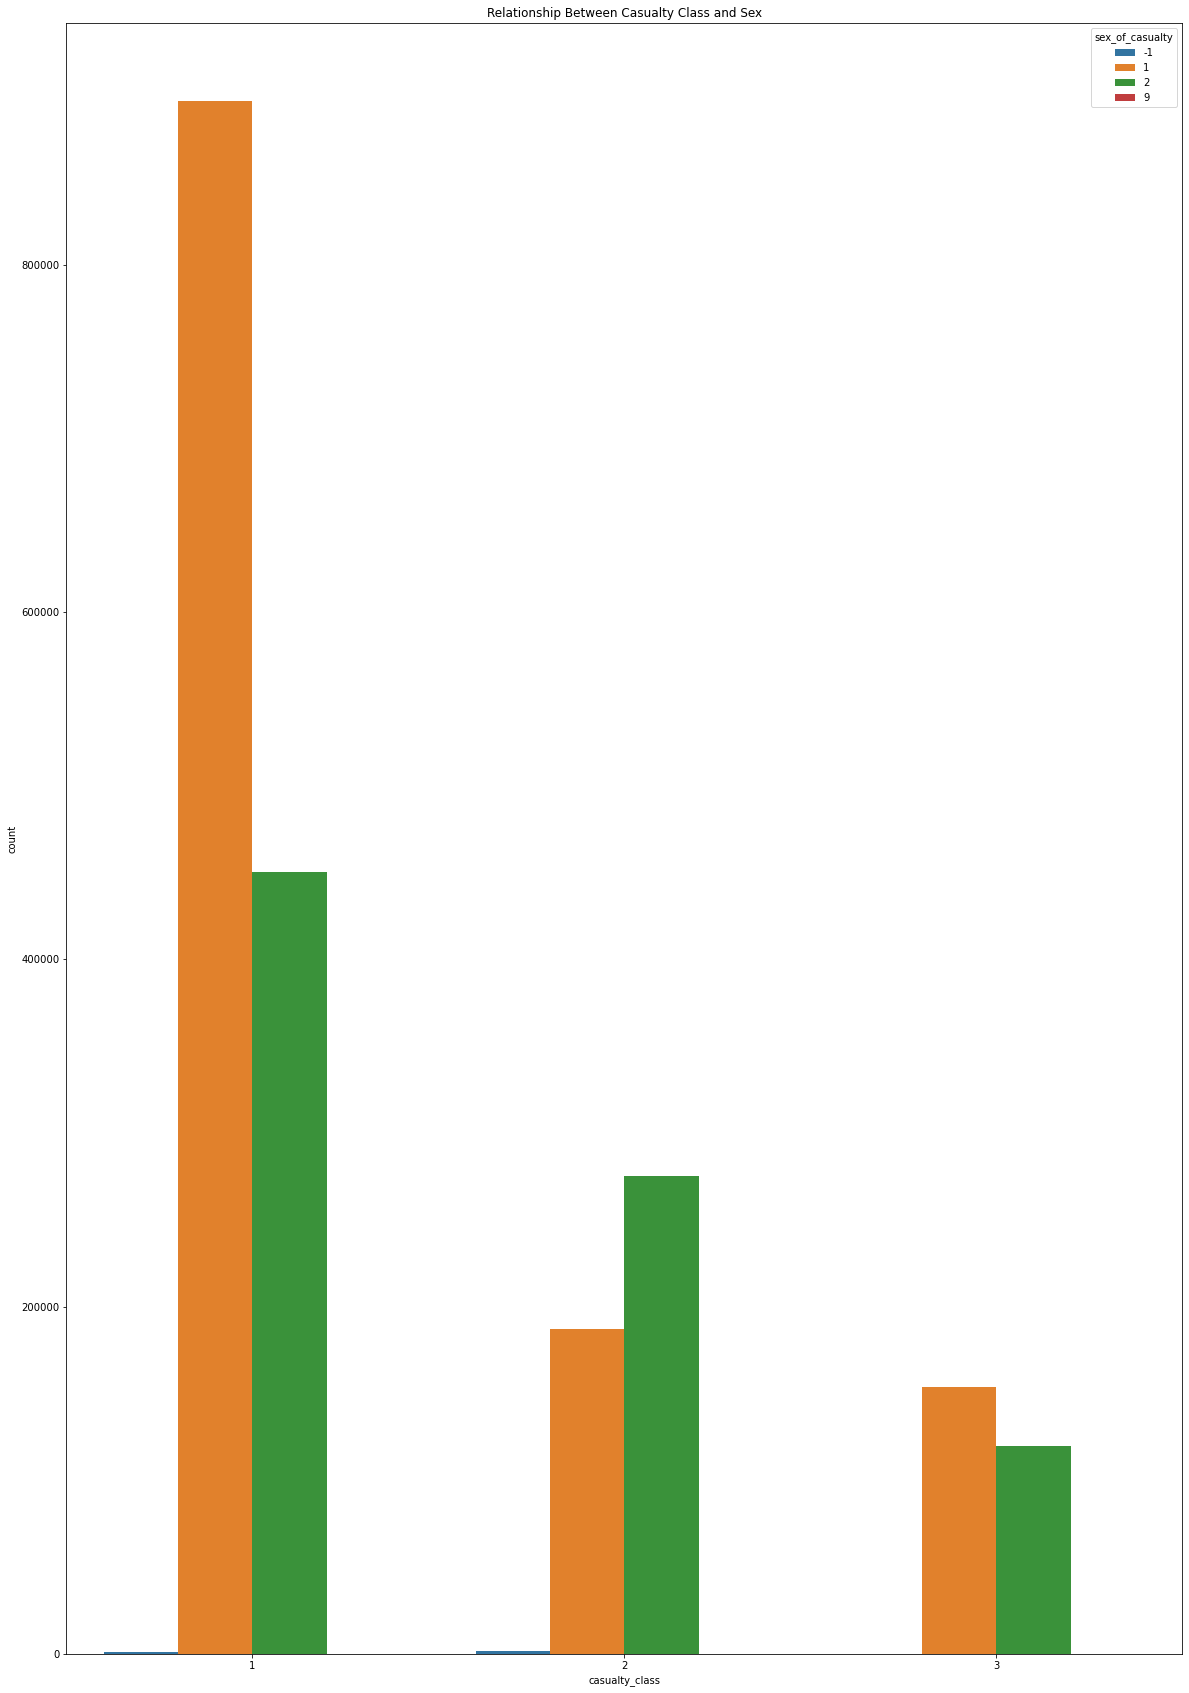

In [13]:
#plot the relationship between casualty class and sex
plt.figure(figsize = (20, 30))
sns.countplot(data = dfc, x = 'casualty_class', hue = 'sex_of_casualty')
plt.title('Relationship Between Casualty Class and Sex');

For Drivers/Rider, a huge majority involved in car accidents were males compared to females

For Passengers, more females compared to men were involved in casualties

In [14]:
#check the value count of the values in age band and present in a plot
dfc.age_band_of_casualty.value_counts()

 6     416687
 7     322666
 8     278751
 5     260063
 4     243038
 9     166867
 10     95276
 3      89195
 11     78457
 2      56935
 1      38382
-1      36265
Name: age_band_of_casualty, dtype: int64

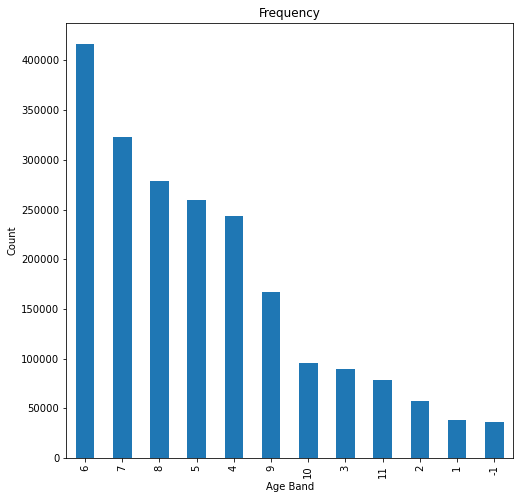

In [15]:
dfc.age_band_of_casualty.value_counts().plot(kind='bar', figsize=(8,8))
plt.xlabel('Age Band')
plt.ylabel('Count')
plt.title('Frequency');

1 - 0 - 5

2 - 6 - 10

3 - 11 - 15

4 - 16 - 20

5 - 21 - 25

6 - 26 - 35

7 - 36 - 45

8 - 46 - 55

9 - 56 - 65

10 - 66 - 75

11 - Over 75

-1 - Data missing or out of range




Ages 26-35 got into the most casualties. The age group with the least casualties is 0-5

In [16]:
#check the value count of the values in age band and present in a plot
dfc.casualty_severity.value_counts()

3    1783905
2     277815
1      20862
Name: casualty_severity, dtype: int64

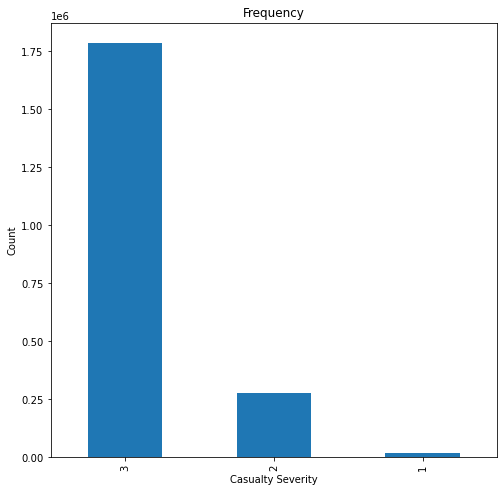

In [17]:
dfc.casualty_severity.value_counts().plot(kind='bar', figsize=(8,8))
plt.xlabel('Casualty Severity')
plt.ylabel('Count')
plt.title('Frequency');

1 - Fatal

2 - Serious

3 - Slight

Majority of the casualties had slight severity

In [18]:
#drop columns that won't be needed
dfc.columns

Index(['Unnamed: 0', 'accident_index', 'accident_year', 'accident_reference',
       'vehicle_reference', 'casualty_reference', 'casualty_class',
       'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
       'casualty_severity', 'pedestrian_location', 'pedestrian_movement',
       'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile', 'lsoa_of_casualty'],
      dtype='object')

In [19]:
dfc.drop(['Unnamed: 0', 'accident_reference', 'vehicle_reference', 'casualty_reference', 'age_of_casualty', 'lsoa_of_casualty'], axis=1, inplace=True)

In [20]:
dfc.columns

Index(['accident_index', 'accident_year', 'casualty_class', 'sex_of_casualty',
       'age_band_of_casualty', 'casualty_severity', 'pedestrian_location',
       'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile'],
      dtype='object')

In [21]:
#convert columns to the right data type
dfc['casualty_class'] = dfc['casualty_class'].astype('category')
dfc['sex_of_casualty'] = dfc['sex_of_casualty'].astype('category')
dfc['age_band_of_casualty'] = dfc['age_band_of_casualty'].astype('category')
dfc['casualty_severity'] = dfc['casualty_severity'].astype('category')
dfc['pedestrian_location'] = dfc['pedestrian_location'].astype('category')
dfc['pedestrian_movement'] = dfc['pedestrian_movement'].astype('category')
dfc['car_passenger'] = dfc['car_passenger'].astype('category')
dfc['bus_or_coach_passenger'] = dfc['bus_or_coach_passenger'].astype('category')
dfc['pedestrian_road_maintenance_worker'] = dfc['pedestrian_road_maintenance_worker'].astype('category')
dfc['casualty_type'] = dfc['casualty_type'].astype('category')
dfc['casualty_home_area_type'] = dfc['casualty_home_area_type'].astype('category')
dfc['casualty_imd_decile'] = dfc['casualty_imd_decile'].astype('category')

In [22]:
dfc.dtypes

accident_index                          object
accident_year                            int64
casualty_class                        category
sex_of_casualty                       category
age_band_of_casualty                  category
casualty_severity                     category
pedestrian_location                   category
pedestrian_movement                   category
car_passenger                         category
bus_or_coach_passenger                category
pedestrian_road_maintenance_worker    category
casualty_type                         category
casualty_home_area_type               category
casualty_imd_decile                   category
dtype: object

In [23]:
dfc.to_csv('updated_casu_data.csv', index=False)

### Model Building

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss

In [25]:
features = dfc.drop(['casualty_severity', 'accident_year', 'accident_index'], axis=1)
target = dfc[['casualty_severity']]

In [26]:
features.columns

Index(['casualty_class', 'sex_of_casualty', 'age_band_of_casualty',
       'pedestrian_location', 'pedestrian_movement', 'car_passenger',
       'bus_or_coach_passenger', 'pedestrian_road_maintenance_worker',
       'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile'],
      dtype='object')

In [27]:
features.shape

(2082582, 11)

In [28]:
target.shape

(2082582, 1)

In [29]:
target.head()

,casualty_severity
0,3
1,3
2,3
3,3
4,3


In [30]:
target.value_counts()

casualty_severity
3                    1783905
2                     277815
1                      20862
dtype: int64

From the value count of the target variable, there is an imbalance in the data.

Therefore, it will be downsized.

In [31]:
#downsize the causalty severity
import numpy as np
label = 'casualty_severity'

g = dfc.groupby(label, group_keys=False)
balanced_df = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()))).reset_index(drop=True)
balanced_df.head()

,accident_index,accident_year,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2017140253345,2017,3,2,11,1,5,9,0,0,0,0,-1,-1
1,2011130177960,2011,1,1,6,1,0,0,0,0,0,5,1,-1
2,2010350089910,2010,1,2,9,1,0,0,0,0,0,9,-1,-1
3,2020991006537,2020,1,1,4,1,0,0,0,0,0,9,3,6
4,201045TA48109,2010,1,1,7,1,0,0,0,0,0,9,-1,-1


In [32]:
balanced_df.casualty_severity.value_counts()

1    20862
2    20862
3    20862
Name: casualty_severity, dtype: int64

In [33]:
balanced_df.shape

(62586, 14)

In [34]:
#replit the data
features = balanced_df.drop(['casualty_severity', 'accident_year', 'accident_index'], axis=1)
target = balanced_df[['casualty_severity']]

In [35]:
features.shape

(62586, 11)

In [36]:
target.shape

(62586, 1)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(features,target, train_size=0.7, test_size=0.3, shuffle=True, stratify=target, random_state=42)


In [38]:
x_train.shape

(43810, 11)

In [39]:
y_train.shape

(43810, 1)

In [40]:
y_test.shape

(18776, 1)

In [41]:
#scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [42]:
xtrain_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)

In [43]:
xtest_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [44]:
xtrain_scaled.var()

casualty_class                        1.000023
sex_of_casualty                       1.000023
age_band_of_casualty                  1.000023
pedestrian_location                   1.000023
pedestrian_movement                   1.000023
car_passenger                         1.000023
bus_or_coach_passenger                1.000023
pedestrian_road_maintenance_worker    1.000023
casualty_type                         1.000023
casualty_home_area_type               1.000023
casualty_imd_decile                   1.000023
dtype: float64

In [45]:
xtest_scaled.var()

casualty_class                        1.010901
sex_of_casualty                       0.993262
age_band_of_casualty                  1.009757
pedestrian_location                   0.979903
pedestrian_movement                   0.982814
car_passenger                         0.991179
bus_or_coach_passenger                0.902377
pedestrian_road_maintenance_worker    0.967474
casualty_type                         0.960271
casualty_home_area_type               0.983995
casualty_imd_decile                   1.014900
dtype: float64

The data has been downsized and scaled, next different algorithms will be tested

In [46]:
# Import KNeighborsClassifier from sklearn's neighbors module and GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [47]:
#downsized unscaled
models = {
          "DecisionTreeClassifier": DecisionTreeClassifier(),
          
          "SVC": SVC(),
          
          "LinearSVC": LinearSVC(), 

          'LogisticRregression': LogisticRegression(),

          'KNeighborsClassifier': KNeighborsClassifier(),

          "RandomForestClassifier": RandomForestClassifier(),

          "GaussianNB": GaussianNB()}

In [48]:
#building on downsized unscaled data

results = {}

for model_name, model in models.items():
    model.fit(x_train, y_train.values.ravel())
    results[model_name] = model.score(x_test, y_test.values.ravel())
    
results

C:\Users\Haywh\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Haywh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'DecisionTreeClassifier': 0.46910950149126546,
 'SVC': 0.49579250106518963,
 'LinearSVC': 0.46894972305070304,
 'LogisticRregression': 0.4565402641670217,
 'KNeighborsClassifier': 0.4396570089475927,
 'RandomForestClassifier': 0.4743289305496378,
 'GaussianNB': 0.4373668512995313}

In [49]:
#building on downsized scaled data
models2 = {
          "DecisionTreeClassifier": DecisionTreeClassifier(),
          
          "SVC": SVC(),
          
          "LinearSVC": LinearSVC(), 

          'LogisticRegression': LogisticRegression(),

          'KNeighborsClassifier': KNeighborsClassifier(),

          "RandomForestClassifier": RandomForestClassifier(),

          "GaussianNB": GaussianNB()}

In [50]:
results2 = {}

for model_name, model in models2.items():
    model.fit(xtrain_scaled, y_train.values.ravel())
    results2[model_name] = model.score(xtest_scaled, y_test.values.ravel())
    
results2

C:\Users\Haywh\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


{'DecisionTreeClassifier': 0.4694290583723903,
 'SVC': 0.4962185769066894,
 'LinearSVC': 0.45211972731146144,
 'LogisticRegression': 0.45606092884533445,
 'KNeighborsClassifier': 0.4380592245419685,
 'RandomForestClassifier': 0.47251810822326373,
 'GaussianNB': 0.4373668512995313}

The downsized unscaled data performed better than the scaled data

SVC came out to be the model with the highest accuracy. It will then be tuned

In [51]:
svc = SVC()

In [52]:
svc.fit(x_train, y_train.values.ravel())

SVC()

In [53]:
#performing predictions on the test dataset
y_pred = svc.predict(x_test)

In [54]:
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.49579250106518963


In [55]:
#create a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.53      0.44      0.48      6258
           2       0.48      0.42      0.45      6259
           3       0.48      0.63      0.54      6259

    accuracy                           0.50     18776
   macro avg       0.50      0.50      0.49     18776
weighted avg       0.50      0.50      0.49     18776



In [56]:
# Create a confusion matrix using the confusion_matrix function
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[2777, 1317, 2164],
       [1597, 2616, 2046],
       [ 827, 1516, 3916]], dtype=int64)

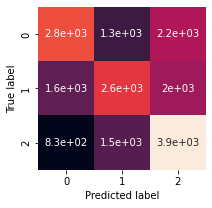

In [57]:
# Create a more visual confusion matrix
import seaborn as sns

def plot_conf_mat(y_test, y_pred):
    """
    Plots a confusion matrix using seaborn's heatmap()
    """
    fix, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test, y_pred)

#### Hyperparameter tuning

In [58]:
#tune with Grid Search CV
kernel = ['rbf', 'poly', 'sigmoid']
C = [0.1, 1, 10, 100] 
gamma = [1, 0.1, 0.01]

grid_param = {'kernel': kernel,

'C': C}

In [59]:
from sklearn.model_selection import GridSearchCV
svc_grid = GridSearchCV(estimator = svc, param_grid = grid_param, cv = 5, verbose=2, n_jobs = -1)

In [60]:
svc_grid.fit(x_train, y_train.values.ravel())

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [61]:
#get the best parameters
svc_grid.best_params_

{'C': 100, 'kernel': 'rbf'}

In [62]:
#fix in the best parameters into svc and build a new model

svc2 = SVC(C= 100, kernel = 'rbf')
svc2.fit(x_train, y_train.values.ravel())

SVC(C=100)

In [63]:
y_predi = svc2.predict(x_test)

In [64]:
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_predi))

ACCURACY OF THE MODEL:  0.5017575628461867
